In [1]:
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from numpy import where
oversample = SMOTE()
from imblearn.under_sampling import RandomUnderSampler
undersample=RandomUnderSampler(sampling_strategy='auto', random_state=42)
import glob
import librosa
import os
import sklearn.mixture
import sys
# import pysptk
import pyworld
import opensmile
import audiofile
#import audb|

import time

import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [2]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)
smile.feature_names

['F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3_sma3_stddevNorm',
 'mfcc4_

In [3]:
class DataPrep:
    def __init__(self, index,folderPath=None):




        self.folderPath = folderPath
        #         self.classFolder = os.listdir(self.folderPath)

        self.spk_files_path = os.path.join(self.folderPath)
        self.spk_files = os.listdir(folderPath)


        #         print(self.classFolder)

        self.file_features = np.zeros((1,88))
#         self.labels = np.zeros(1)

        Y=[0]
        spk_label=['sp']
#         for spks in range(len(self.spk_folders)):

#             print(self.spk_folders[spks])

#             self.spk_files_path = os.path.join(self.folderPath, self.spk_folders[spks])
#             self.spk_files = os.listdir(self.spk_files_path)

            #                 print(self.spk_files)

        for spk_file in range(len(self.spk_files)):

            wav_path = os.path.join(self.folderPath,self.spk_files[spk_file])
#                 print(wav_path)


            y = smile.process_file(wav_path)

            ######################################################################

            #                     print(mfcc)

            file_feats = np.asarray(y)

            self.file_features = np.concatenate((self.file_features, file_feats),axis=0)
            label=folderPath
            label=label[index]
#             print(label)
#                 print(label)
            if label=='D':
                l=0
            else:
                l=1

#                 print(l)
            Y.append(l)
            spk_label.append(folderPath)
#                 self.labels = np.concatenate((self.labels,np.ones((len(file_feats),1))*y),axis=0)
                #                 self.labels = np.concatenate((self.labels,np.ones((len(file_feats),1))*cls), axis=0)
#                 print(len(self.labels))


        self.file_features = self.file_features[1:,:]
        print(self.file_features.shape)

        self.labels=np.asarray(Y)
        self.labels=self.labels.T
        self.labels=self.labels[1:]

        self.speaker_labels=np.asarray(Y)
        self.speaker_labels=self.speaker_labels.T
        self.speaker_labels=self.speaker_labels[1:]

In [4]:
def accuracy(y_test, prob_score, s_test):
    spk_list=list(set(s_test))
#     print(spk_list)
    avg_score=np.zeros((len(spk_list),2))

    for i in range(len(spk_list)):
        count=0
        for j in range(len(s_test)):
            if (spk_list[i] == s_test[j]):
                avg_score[i,0]=avg_score[i,0]+prob_score[j,0]
                avg_score[i,1]=avg_score[i,1]+prob_score[j,1]
                count=count+1
        avg_score[i]=avg_score[i]/(count)

    y_final=[10]
    for i in range(len(spk_list)):
        if (avg_score[i,0]>=avg_score[i,1]):
            y_final.append(0)
        else:
            y_final.append(1)
    y_final=y_final[1:]
    y_test=[10]
    for i in range(len(spk_list)):
        label=spk_list[i][2]
        if label=='D':
            y_test.append(0)
        else:
            y_test.append(1)
    y_test=y_test[1:]

    print("Speaker level accuracy: ",accuracy_score(y_test, y_final))
    print(sklearn.metrics.confusion_matrix(y_test, y_final))


## Loading Data

In [5]:
Train_dataD=DataPrep(20,'Training/Utterances_D')
Train_dataN=DataPrep(20,'Training/Utterances_ND')

Test_dataD=DataPrep(10,'Test/Test_D')
Test_dataN=DataPrep(10,'Test/Test_ND')

(57, 88)
(192, 88)
(33, 88)


C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\opensmile\core\smile.py:307: UserWarning: Segment too short, filling with NaN.
  warnings.warn(


(201, 88)


## Preprocessing Data

In [121]:
X_trainD=Train_dataD.file_features
# Y_trainD=Train_dataD.labels
S_trainD=Train_dataD.speaker_labels

X_trainN=Train_dataN.file_features
# Y_trainN=Train_dataN.labels
S_trainN=Train_dataN.speaker_labels

X_testD=Test_dataD.file_features
# Y_testD=Test_dataD.labels
S_testD=Test_dataD.speaker_labels

X_testN=Test_dataN.file_features
# Y_testN=Test_dataN.labels
S_testN=Test_dataN.speaker_labels
S_testD

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [122]:

X_train_full=np.concatenate((X_trainD, X_trainN),axis=0)
# y_train_full=np.concatenate((Y_trainD, Y_trainN),axis=0)
s_train_full=np.concatenate((S_trainD, S_trainN),axis=0)


X_test_full=np.concatenate((X_testD, X_testN),axis=0)
# y_test_full=np.concatenate((Y_testD, Y_testN),axis=0)
s_test_full=np.concatenate((S_testD, S_testN),axis=0)
print(np.shape(X_train_full))
# np.shape(y_test_full)
np.shape(s_train_full)

s_train_full

(249, 88)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [123]:
X_train_full, X_test, s_train_full, s_test = train_test_split(X_train_full, s_train_full, test_size=0.001, shuffle=True, random_state=0)

In [124]:
X_train1_full=X_train_full[~np.isnan(X_train_full).any(axis=1)]
nan_index_full=np.argwhere(np.isnan(X_train_full)) ## identify the nan rows for removing those from labels

# removal_rows_full=np.unique(nan_index_full[:,0])
# y_train1_full=np.delete(y_train_full,removal_rows_full,axis=0)

removal_rows_full=np.unique(nan_index_full[:,0])
s_train1_full=np.delete(s_train_full,removal_rows_full,axis=0)

X_train=X_train1_full
# y_train=y_train1_full
s_train=s_train1_full

##################################################################
X_test1_full=X_test_full[~np.isnan(X_test_full).any(axis=1)]
nan_index_full=np.argwhere(np.isnan(X_test_full))

# removal_rows_full=np.unique(nan_index_full[:,0])
# y_test1_full=np.delete(y_test_full,removal_rows_full,axis=0)

removal_rows_full=np.unique(nan_index_full[:,0])
s_test1_full=np.delete(s_test_full,removal_rows_full,axis=0)

X_test=X_test1_full
# y_test=y_test1_full
s_test=s_test1_full
print(len(X_train1_full))
print((len(X_test)))

248
233


In [125]:
train_spk_list=list(set(s_train))
print(train_spk_list)
test_spk_list=list(set(s_test))
print(test_spk_list)


y_train=[10]
for i in range(len(s_train)):
    label=s_train[i]
    if label==0:
        y_train.append(0)
    else:
        y_train.append(1)
y_train=y_train[1:]

y_test=[10]
for i in range(len(s_test)):
    label=s_test[i]
    if label==0:
        y_test.append(0)
    else:
        y_test.append(1)
y_test=y_test[1:]

[0, 1]
[0, 1]


In [126]:
X_train_perm1=X_train
X_test_perm1=X_test
y_train_perm1=y_train
y_test_perm1=y_test

In [127]:
X_train.shape

(248, 88)

In [128]:
etc=ExtraTreesClassifier(n_estimators=150,verbose=True)
etc=etc.fit(X_train, y_train)
th=-np.sort(-etc.feature_importances_)[87]
res = [idx for idx, val in enumerate(etc.feature_importances_) if val >= th]
res=np.asarray(res)
res.T
X_train_new=(X_train[:,res])
X_test_new=X_test[:,res]
X_train_new.shape
y_train_new=np.array(y_train)
y_test_new=np.array(y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


In [129]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled =scaler.fit_transform(X_train_new)
test_scaled = scaler.fit_transform(X_test_new)
X_train_new=train_scaled
X_test_new=test_scaled
X_train_new.shape

array([[ 1.51311815,  1.97050843,  0.09658381, ...,  1.35120095,
         0.95980361, -1.51094771],
       [-0.59597862, -1.1951274 , -0.41158607, ..., -0.27318869,
        -0.69376497,  2.23798962],
       [-1.88808655, -0.34753004, -1.78448967, ..., -0.55852508,
        -0.55703479,  0.97443427],
       ...,
       [ 0.91810893,  0.04676656,  0.99872955, ..., -0.00381257,
         0.09127243,  0.0224555 ],
       [-0.65824751,  1.70734329, -0.80350621, ...,  1.19052964,
         0.92043859,  1.51528981],
       [-1.63698254,  1.62589371, -1.54375847, ...,  2.32937427,
         1.28049311, -1.71487152]])

In [58]:
X_train_new, y_train = oversample.fit_resample(X_train_new, y_train)

In [59]:
X_test_new, y_test = oversample.fit_resample(X_test_new, y_test)

In [130]:
y_train_new=np.array(y_train)
y_test_new=np.array(y_test)

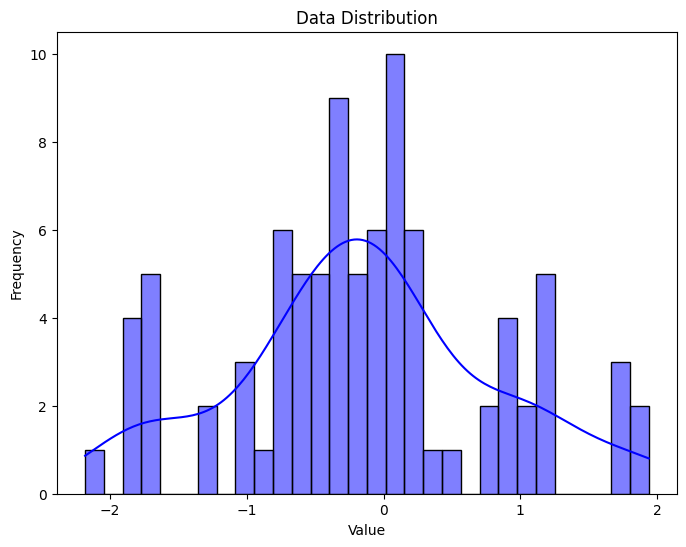

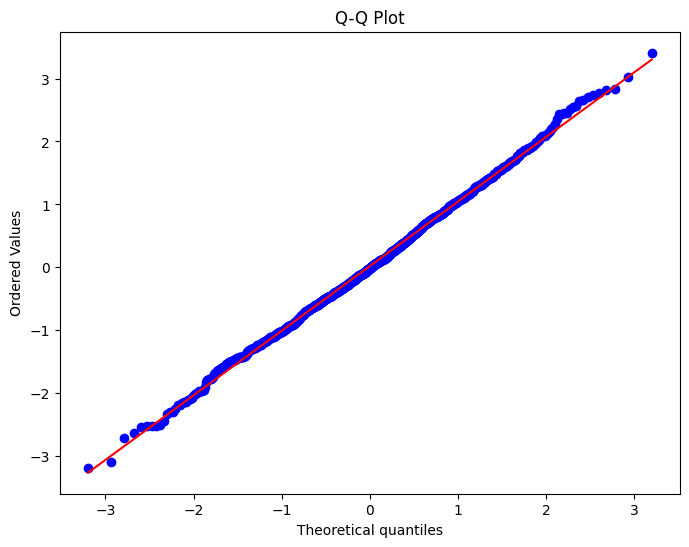

Data appears to be normally distributed (p-value = 0.6107)


In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate some example data (replace this with your actual data)
data = np.random.normal(loc=0, scale=1, size=1000)

# Plot a histogram to visualize the data distribution
plt.figure(figsize=(8, 6))
sns.histplot(X_train_new[2], kde=True, bins=30, color='blue')
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Check if the data is Gaussian using a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data, plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Perform a normality test (Shapiro-Wilk test)
p_value = stats.shapiro(data).pvalue
if p_value > 0.05:
    print("Data appears to be normally distributed (p-value = {:.4f})".format(p_value))
else:
    print("Data does not appear to be normally distributed (p-value = {:.4f})".format(p_value))


In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_enc=label_encoder.fit_transform(y_train_new)
y_enc

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [119]:
n1=np.count_nonzero(y_train_new== 0)
n2=np.count_nonzero(y_train_new== 1)
if(n1==n2):
    print("Resampled")
else:
    print("n1:",n1," ,n2: ",n2)

n1: 57  ,n2:  191


In [120]:
n1=np.count_nonzero(y_test_new== 0)
n2=np.count_nonzero(y_test_new== 1)
if(n1==n2):
    print("Resampled")
else:
    print("n1:",n1," ,n2: ",n2)

n1: 33  ,n2:  200


In [34]:
type(y_train_new[0])

numpy.int32

# ANN

In [26]:
import tensorflow as tf
from tensorflow.keras import Model,initializers
from tensorflow.keras.layers import Input, Dense
ncol=88
input_dim = Input(shape = (ncol, ))
model = tf.keras.Sequential([
    Input(shape = (ncol, )),
#     tf.keras.layers.Dense(88, activation='relu')(input_dim),
    tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation=tf.keras.layers.LeakyReLU(alpha=0.3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid',kernel_initializer=initializers.HeNormal())
])
model.build()

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                5696      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
batch_size=32
nb_epoch=100
model.fit(X_train_new, y_train_new,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(X_test_new, y_test_new))

Epoch 1/100
8/8 [==============================] - 1s 22ms/step - loss: 1.0313 - accuracy: 0.5645 - val_loss: 0.5399 - val_accuracy: 0.7124
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6915 - accuracy: 0.6774 - val_loss: 0.5046 - val_accuracy: 0.7639
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7036 - accuracy: 0.6694 - val_loss: 0.4749 - val_accuracy: 0.7983
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7463 - accuracy: 0.6613 - val_loss: 0.4672 - val_accuracy: 0.8112
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5857 - accuracy: 0.7298 - val_loss: 0.4709 - val_accuracy: 0.8112
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6017 - accuracy: 0.7137 - val_loss: 0.4792 - val_accuracy: 0.8197
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6035 - accuracy: 0.7097 - val_loss: 0.4791 - val_accuracy: 0.8240
Epoch 8/100
8/8 [=========

In [30]:
y_pred=model.predict(X_test_new)

8/8 [==============================] - 0s 714us/step


In [35]:
y_pred

array([[1.00000000e+00],
       [9.99381602e-01],
       [5.58695614e-01],
       [9.99994934e-01],
       [3.06563675e-01],
       [4.61528838e-01],
       [9.99815822e-01],
       [1.00000000e+00],
       [9.77589190e-01],
       [9.99673724e-01],
       [1.00000000e+00],
       [9.99991179e-01],
       [9.99989152e-01],
       [3.04641873e-01],
       [3.75414093e-04],
       [3.13020289e-01],
       [9.92464721e-01],
       [9.98475909e-01],
       [1.00000000e+00],
       [8.76595438e-01],
       [9.99986708e-01],
       [7.09888339e-02],
       [9.96186137e-01],
       [9.07742977e-01],
       [9.07217443e-01],
       [9.99900579e-01],
       [8.64824772e-01],
       [9.05821443e-01],
       [9.99953210e-01],
       [1.00000000e+00],
       [9.99674916e-01],
       [9.99972522e-01],
       [9.98376191e-01],
       [9.99999821e-01],
       [1.94849387e-01],
       [1.00000000e+00],
       [9.99609828e-01],
       [9.32016432e-01],
       [9.99999642e-01],
       [3.25644069e-05],


In [31]:
predicted_classes = (y_pred > 0.5).astype("int32")
predicted_classes

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [24]:
accuracy = accuracy_score(y_test_new, predicted_classes)

In [25]:
accuracy

0.759656652360515

8/8 [==============================] - 0s 712us/step
0.759656652360515
              precision    recall  f1-score   support

      class0       0.22      0.27      0.24        33
      class1       0.88      0.84      0.86       200

    accuracy                           0.76       233
   macro avg       0.55      0.56      0.55       233
weighted avg       0.78      0.76      0.77       233



NameError: name 'plt' is not defined

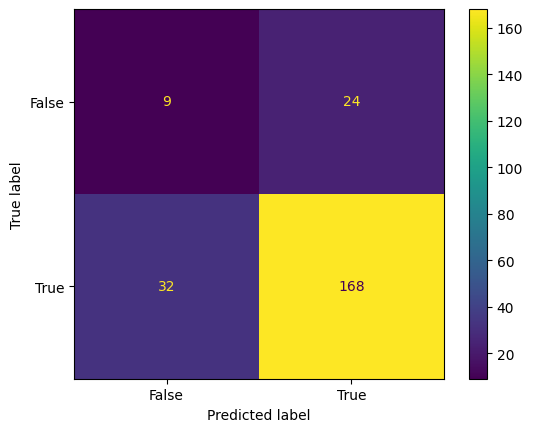

In [26]:
y_pred=model.predict(X_test_new)
predicted_classes = (y_pred > 0.5).astype("int32")
predicted_classes
accuracy = accuracy_score(y_test_new, predicted_classes)
print(accuracy)
import sklearn
sklearn.metrics.confusion_matrix(y_test, predicted_classes)
print(sklearn.metrics.classification_report(y_test,predicted_classes,target_names=["class0","class1"]))
confusion_matrix = sklearn.metrics.confusion_matrix(y_test_new,predicted_classes)
# dt_score=pipe2.predict_proba(X_test_new)
# print("dt_score is ",dt_score)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# CNN

In [88]:
y_train_new

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1])

In [89]:
import matplotlib.pyplot as plt

In [90]:
import tensorflow as tf
from tensorflow.keras import layers


model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(88, 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the summary of the model
model3.summary()



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 86, 32)            128       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 43, 32)           0         
 1D)                                                             
                                                                 
 dropout_57 (Dropout)        (None, 43, 32)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 41, 64)            6208      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 20, 64)           0         
 1D)                                                             
                                                                 
 dropout_58 (Dropout)        (None, 20, 64)          

In [91]:
model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [92]:
batch_size3=16
nb_epoch3=50
model3.fit(X_train_new, y_train_new,
          batch_size=batch_size3,
          epochs=nb_epoch3,
          verbose=1)

Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.5794 - accuracy: 0.7702
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5461 - accuracy: 0.7702
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5510 - accuracy: 0.7702
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5495 - accuracy: 0.7702
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5438 - accuracy: 0.7702
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5469 - accuracy: 0.7702
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5428 - accuracy: 0.7702
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5422 - accuracy: 0.7702
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5430 - accuracy: 0.7702
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.7702
Epoch 11/50
16/16 [

In [93]:
y_pred=model3.predict(X_test_new)
predicted_classes = (y_pred > 0.5).astype("int32")
predicted_classes
accuracy = accuracy_score(y_test_new, predicted_classes)
print(accuracy)
import sklearn
sklearn.metrics.confusion_matrix(y_test, predicted_classes)
print(sklearn.metrics.classification_report(y_test,predicted_classes,target_names=["class0","class1"]))

13/13 [==============================] - 0s 1ms/step
0.5725
              precision    recall  f1-score   support

      class0       0.61      0.41      0.49       200
      class1       0.55      0.74      0.63       200

    accuracy                           0.57       400
   macro avg       0.58      0.57      0.56       400
weighted avg       0.58      0.57      0.56       400



13/13 [==============================] - 0s 1ms/step
0.5725
              precision    recall  f1-score   support

      class0       0.61      0.41      0.49       200
      class1       0.55      0.74      0.63       200

    accuracy                           0.57       400
   macro avg       0.58      0.57      0.56       400
weighted avg       0.58      0.57      0.56       400



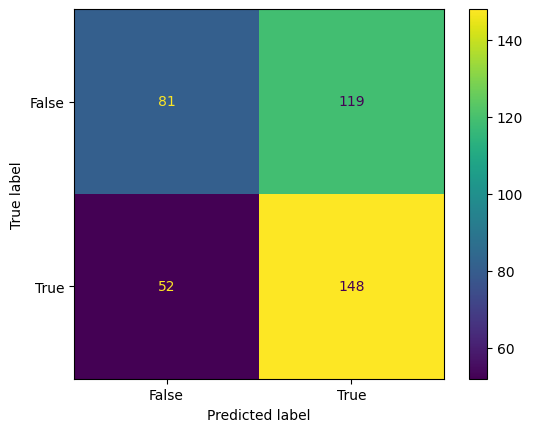

In [94]:
y_pred=model3.predict(X_test_new)
predicted_classes = (y_pred > 0.5).astype("int32")
predicted_classes
accuracy = accuracy_score(y_test_new, predicted_classes)
print(accuracy)
import sklearn
sklearn.metrics.confusion_matrix(y_test, predicted_classes)
print(sklearn.metrics.classification_report(y_test,predicted_classes,target_names=["class0","class1"]))
confusion_matrix = sklearn.metrics.confusion_matrix(y_test_new,predicted_classes)
# dt_score=pipe2.predict_proba(X_test_new)
# print("dt_score is ",dt_score)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# 2D CNN

In [75]:
# no resample
X_train_reshaped=np.reshape(X_train_new,(248,11,8))
# train_resample
# X_train_reshaped=np.reshape(X_train_new,(382,22,4))

In [76]:
#no resample
X_test_reshaped=np.reshape(X_test_new,(233,11,8))
# test resample
# X_test_reshaped=np.reshape(X_test_new,(400,22,4))

In [111]:
import tensorflow as tf
from tensorflow.keras import layers

input_shape = (11, 8, 1)

model4 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.35),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.35),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model4.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 11, 8, 32)         320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 4, 32)         0         
 g2D)                                                            
                                                                 
 dropout_68 (Dropout)        (None, 5, 4, 32)          0         
                                                                 
 conv2d_52 (Conv2D)          (None, 5, 4, 64)          18496     
                                                                 
 dropout_69 (Dropout)        (None, 5, 4, 64)          0         
                                                                 
 conv2d_53 (Conv2D)          (None, 5, 4, 128)         73856     
                                                     

In [112]:
model4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
batch_size4=32
nb_epoch4=100
model4.fit(X_train_reshaped, y_train_new,
          batch_size=batch_size4,
          epochs=nb_epoch4,
          verbose=1)

NameError: name 'model4' is not defined

In [37]:
y_pred=model4.predict(X_test_reshaped)
predicted_classes = (y_pred > 0.5).astype("int32")
predicted_classes
accuracy = accuracy_score(y_test_new, predicted_classes)
print(accuracy)
import sklearn
sklearn.metrics.confusion_matrix(y_test, predicted_classes)
print(sklearn.metrics.classification_report(y_test,predicted_classes,target_names=["class0","class1"]))
confusion_matrix = sklearn.metrics.confusion_matrix(y_test_new,predicted_classes)
# dt_score=pipe2.predict_proba(X_test_new)
# print("dt_score is ",dt_score)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

NameError: name 'model4' is not defined

# RNN

In [106]:
num_steps=8
num_cols=88
X_train_lstm = X_train_new.reshape((31,8,88))
# X_train_lstm[0].shape
# y_train_lstm = y_train_new.reshape(248, , 1)
# X_test_lstm = (X_test_new.drop(df.tail(1).index,inplace=False)).reshape((232, 4,22))
print(type(X_train_new))
print(X_train_lstm.shape)

<class 'numpy.ndarray'>
(31, 8, 88)


In [122]:
window_size = 8

# Create the sliding windows for X_train
X_train_lstm = np.array([X_train_new[i:i + window_size] for i in range(len(X_train_new) - window_size + 1)])

# Adjust the shape of y_train accordingly
y_train_lstm = np.array([y_train_new[i * window_size] for i in range(len(y_train_new) - window_size )])
X_test_lstm = np.array([X_test_new[i:i + window_size] for i in range(len(X_test_new) - window_size + 1)])

# Adjust the shape of y_train accordingly
y_test_lstm = y_test_new[window_size - 1:]

IndexError: index 248 is out of bounds for axis 0 with size 248

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

ncol = 88
n_units = 100
n_classes=1
model5 = Sequential()
model5.add(LSTM(n_units, input_shape=(None, ncol), return_sequences=True))
model5.add(Dropout(0.5))
model5.add(LSTM(n_units, return_sequences=True))
model5.add(LSTM(n_units))
model5.add(Dropout(0.5))
model5.add(Dense(50, activation='relu'))
model5.add(Dense(112, activation='relu'))
model5.add(Dense(n_classes, activation='softmax')) 

model5.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, None, 100)         75600     
                                                                 
 dropout_36 (Dropout)        (None, None, 100)         0         
                                                                 
 lstm_43 (LSTM)              (None, None, 100)         80400     
                                                                 
 lstm_44 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_37 (Dropout)        (None, 100)               0         
                                                                 
 dense_36 (Dense)            (None, 50)                5050      
                                                                 
 dense_37 (Dense)            (None, 112)             

In [118]:
model5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [119]:
batch_size4=16
nb_epoch4=50
model5.fit(X_train_lstm, y_train_lstm,
          batch_size=batch_size4,
          epochs=nb_epoch4,
          verbose=1)

Epoch 1/50
16/16 [==============================] - 3s 8ms/step - loss: 0.6450 - accuracy: 0.7676
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5398 - accuracy: 0.7676
Epoch 3/50
16/16 [==============================] - 0s 9ms/step - loss: 0.5156 - accuracy: 0.7676
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 0.4838 - accuracy: 0.7676
Epoch 5/50
16/16 [==============================] - 0s 9ms/step - loss: 0.4562 - accuracy: 0.7676
Epoch 6/50
16/16 [==============================] - 0s 9ms/step - loss: 0.4446 - accuracy: 0.7676
Epoch 7/50
16/16 [==============================] - 0s 9ms/step - loss: 0.4137 - accuracy: 0.7676
Epoch 8/50
16/16 [==============================] - 0s 9ms/step - loss: 0.3806 - accuracy: 0.7676
Epoch 9/50
16/16 [==============================] - 0s 9ms/step - loss: 0.3895 - accuracy: 0.7676
Epoch 10/50
16/16 [==============================] - 0s 9ms/step - loss: 0.3368 - accuracy: 0.7676
Epoch 11/50
16/16 [

In [120]:
y_pred=model5.predict(X_test_lstm)
predicted_classes = (y_pred > 0.5).astype("int32")
predicted_classes
accuracy = accuracy_score(y_test_new, predicted_classes)
print(accuracy)
import sklearn
sklearn.metrics.confusion_matrix(y_test_new, predicted_classes)
print(sklearn.metrics.classification_report(y_test_new,predicted_classes,target_names=["class0","class1"]))
confusion_matrix = sklearn.metrics.confusion_matrix(y_test_new,predicted_classes)
# dt_score=pipe2.predict_proba(X_test_new)
# print("dt_score is ",dt_score)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

8/8 [==============================] - 1s 4ms/step


ValueError: Found input variables with inconsistent numbers of samples: [233, 226]

# PCA Dimensionality Reduction

In [141]:
X_train_new2=pd.DataFrame(X_train_new)
X_train_new2

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,1.513118,1.970508,0.096584,1.213198,3.288336,8.290072,0.594738,-0.194677,0.744825,-0.094796,...,0.397891,-0.589239,-0.612339,-0.766777,-0.779510,-1.719256,-0.607113,1.351201,0.959804,-1.510948
1,-0.595979,-1.195127,-0.411586,-0.538398,-0.600355,-0.494426,-0.386081,-0.405590,-0.487057,-0.576851,...,-1.022605,-1.552170,4.342698,0.308552,0.233659,-0.404791,-0.481910,-0.273189,-0.693765,2.237990
2,-1.888087,-0.347530,-1.784490,-1.845800,-1.769126,0.021752,-0.699256,-0.583792,-0.440530,-0.477459,...,-0.733342,-0.299189,1.177809,0.562120,0.869883,-0.664975,-0.445259,-0.558525,-0.557035,0.974434
3,0.563491,0.218111,0.560136,0.500889,0.451271,-0.277030,0.231283,0.834084,0.174838,-0.265630,...,-0.609149,1.075085,0.653325,0.013183,0.838525,-1.434447,-0.985189,0.047065,1.215829,0.483888
4,-1.211571,0.263148,-1.395636,-1.250090,-0.649246,1.924205,0.162506,-0.503041,0.617508,0.073647,...,0.527538,-0.609930,2.019873,0.553807,-0.508640,-1.404552,-1.297233,0.761888,-0.402887,0.361958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.602308,-1.369620,0.767031,0.697018,0.526908,-0.615806,-1.024975,-0.875302,-0.545711,-0.583792,...,-0.667527,-0.141810,0.615117,-0.255957,-0.766130,3.436259,2.529719,-1.407350,-1.445811,1.488299
244,0.664073,0.017667,0.720504,0.638987,0.613027,-0.271795,1.119662,1.407819,0.421031,1.411578,...,-0.288738,-0.034570,-0.579584,0.105663,0.501762,-0.185152,0.325438,-0.522189,-0.410938,-0.931371
245,0.918109,0.046767,0.998730,0.998290,1.049026,0.140779,0.042571,-0.367552,-0.173490,-0.411735,...,-0.822573,1.442686,-0.216976,-0.490003,0.007893,-0.555107,0.588518,-0.003813,0.091272,0.022456
246,-0.658248,1.707343,-0.803506,-0.750108,-0.520284,0.727367,-0.798481,-0.891056,1.523592,0.948107,...,-1.255884,0.426897,-0.512057,-1.911855,-1.416215,-0.088169,-0.432154,1.190530,0.920439,1.515290


In [142]:
X_test_new2=pd.DataFrame(X_test_new)
X_test_new2

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,-0.285938,0.242557,-0.286715,-0.364294,-0.380403,-0.195662,-1.082446,-0.987348,-0.774044,-0.703609,...,0.653244,1.607903,-0.948603,-1.769252,-2.386904,-0.590252,-0.399789,5.822628,7.069110,-0.264357
1,0.986582,-0.855550,1.384106,1.339242,0.727837,-0.406651,-0.721290,-0.757390,-0.677525,-0.636772,...,1.340844,-0.113202,-0.606441,0.621610,-0.815964,0.883735,0.499152,0.173709,-0.034701,0.049031
2,1.321187,-0.174467,1.244775,1.141152,0.530065,-0.517474,0.028442,-0.346456,0.243376,-0.298667,...,0.480291,1.937051,-1.002393,-0.479521,-0.405375,0.118178,0.617646,0.395924,1.360235,-1.724839
3,-0.297431,2.203993,-1.116040,-1.253173,0.013638,1.059855,0.620737,0.585810,0.424818,-0.171470,...,-0.905005,-0.637109,-0.048774,-0.242652,0.678770,-0.848434,-1.218480,-0.011469,-0.041332,0.142284
4,1.586368,0.125529,2.055338,1.935974,1.361422,-0.261819,-0.045929,-0.273899,-0.321292,-0.283763,...,-1.563672,0.439904,0.521120,-1.420818,-1.024683,-0.181563,-0.076774,1.156130,0.683867,0.572678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,-0.914347,0.434481,-1.203220,-1.047485,-0.491703,0.525389,-0.909695,-0.907383,-0.581671,-0.652451,...,-1.012989,-1.426552,-0.786546,-1.746409,-1.527213,-0.846794,-0.653230,2.929945,1.929405,-0.548257
229,-0.869489,-0.001875,-0.570223,-0.678439,-0.836955,-0.487139,1.157936,2.072065,-0.294317,-0.006166,...,0.198454,1.355145,-0.705872,-0.245315,-0.273891,0.385494,0.619837,-0.104239,0.965383,0.557082
230,0.101748,-0.152804,0.040954,0.112466,-0.038619,-0.085355,-0.642890,-0.663832,-0.591159,-0.539375,...,0.247957,0.770391,-0.869237,-0.865726,-0.534950,0.177910,-0.151110,0.624788,2.957378,-0.329204
231,0.839742,-1.274049,1.135707,1.239213,0.647969,-0.271809,0.044292,-0.011349,-0.652285,-0.323187,...,0.228894,-0.569579,-0.348939,-0.656453,-0.178186,-0.162030,-0.640012,-0.052633,-0.265038,-0.260014


In [143]:
from sklearn.decomposition import PCA

<Axes: >

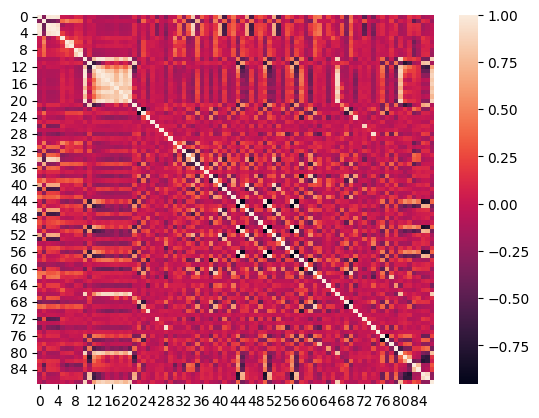

In [144]:
sns.heatmap(X_train_new2.corr())

In [145]:
pca = PCA(n_components = 20)
pca.fit(X_train_new2)
data_pca = pca.transform(X_train_new2)
data_pca = pd.DataFrame(data_pca)
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-3.865027,6.587751,9.736241,0.345745,-0.208182,1.888785,2.462641,-0.242018,1.605795,-2.803796,3.907663,8.083525,4.636651,1.162726,0.739522,0.897347,-4.333439,3.653952,-0.825478,-2.166753
1,9.191094,0.882871,-4.225682,-4.977143,0.641822,-0.780578,2.991919,1.438171,0.665608,-1.435316,-0.227879,-1.079175,0.347964,0.810548,2.581171,0.456902,-0.573714,-0.559394,0.091831,-0.571885
2,5.540181,3.627699,-3.148644,-0.866289,0.135895,-0.752306,0.370842,2.312261,0.420096,1.449945,-0.075855,0.379965,-1.455354,0.055842,-1.087397,0.002089,-0.057751,0.975345,1.736316,0.399484
3,3.833188,5.365143,7.487020,-3.525228,-3.255993,1.834514,5.602646,2.493526,-2.669203,1.340768,-0.470173,8.729043,-2.702116,-2.627655,-1.451201,-2.762478,0.682229,1.904952,1.040896,-4.970681
4,0.477783,6.185830,-1.398690,-1.605055,2.071866,2.700845,-1.234913,1.413901,1.702032,0.001405,2.688550,-0.699694,0.001370,2.850223,-0.974973,-0.832641,-0.010338,0.484928,0.311326,1.228434


In [146]:
pca1 = PCA(n_components = 20)
pca1.fit(X_test_new2)
test_pca = pca1.transform(X_test_new2)
test_pca = pd.DataFrame(test_pca)
test_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-4.758529,-5.545319,2.309814,5.513933,-7.205757,0.259663,2.982109,4.443874,-0.726159,2.056435,0.142979,-0.402674,-1.447288,-0.859536,1.788552,-1.622088,-0.556928,2.028349,0.432315,-0.882125
1,-3.385294,6.462202,1.893394,1.358472,1.294557,0.238076,-2.741977,0.749641,0.801784,-0.385429,-0.333551,0.920790,0.319172,1.226725,-0.798391,0.789877,-0.598815,1.368896,1.385438,0.257842
2,-0.949613,-2.596174,6.586980,-1.329166,0.224073,0.155469,1.469981,1.138108,0.612441,0.492137,-0.373356,-0.770376,0.550671,0.230687,1.358609,0.123826,-0.454783,0.884857,0.025471,-1.099460
3,0.042097,-3.964519,-1.908277,0.753518,2.182416,-2.205186,-1.457802,0.763997,-0.418112,-1.206136,0.548034,1.055734,-0.336771,-0.140687,-0.217116,0.703546,-1.316197,-0.441851,-0.467449,0.353303
4,-0.189880,0.186120,2.202861,4.785725,-3.422238,-0.973892,2.118380,-1.824950,1.555470,-0.220635,0.269364,1.105886,0.191065,0.380465,0.085683,0.472019,-0.044191,-1.345395,0.418193,-0.127308


<Axes: >

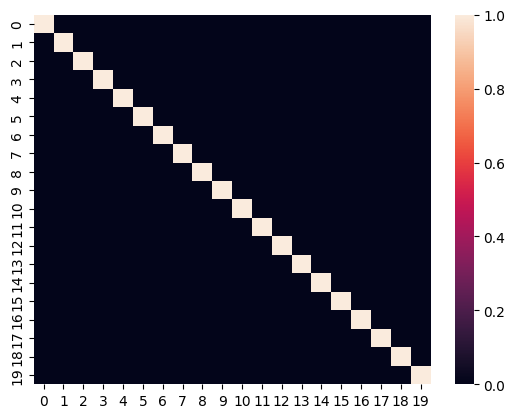

In [147]:
sns.heatmap(data_pca.corr())

<Axes: >

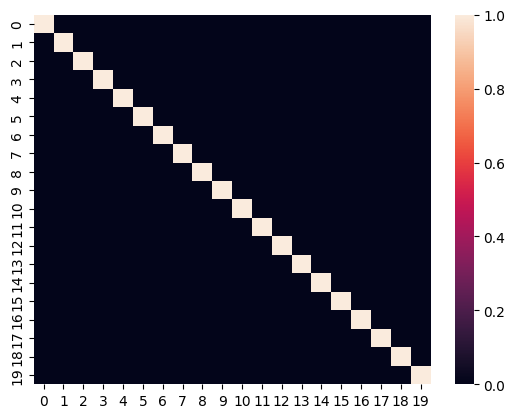

In [148]:
sns.heatmap(test_pca.corr())

In [149]:
def balanceaccuracy(matrix):
    acc=(matrix[0][0]/(matrix[0][0]+matrix[0][1]))+(matrix[1][1]/(matrix[1][0]+matrix[1][1]))
#     print(acc)
    acc=acc/2
    return acc

In [150]:
asd=[[9,1],[2,8]]
print(balanceaccuracy(asd))

0.8500000000000001


# Decision Tree Without K-fold Cross Validation

In [151]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [152]:
import matplotlib.pyplot as plt

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.7939914163090128
0.8787878787878789
              precision    recall  f1-score   support

      class0       0.30      0.33      0.31        33
      class1       0.89      0.87      0.88       200

    accuracy                           0.79       233
   macro avg       0.59      0.60      0.60       233
weighted avg       0.80      0.79      0.80       233

Balanced Accuracy: 0.6016666666666667


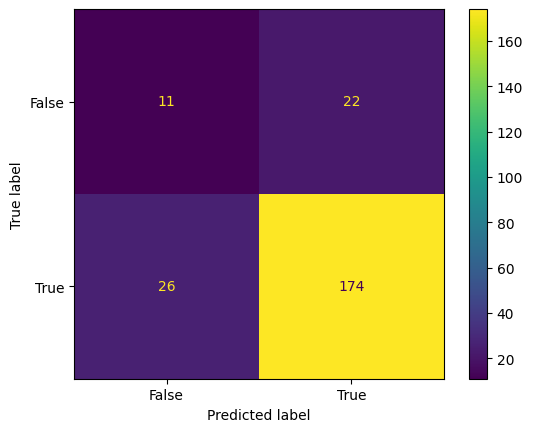

In [153]:
pipe2 = Pipeline([ ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)

# fitting the data in the pipe
pipe2.fit(data_pca, y_train)

prob_score2=pipe2.predict_proba(test_pca)

print("Utterance level accuracy: ",accuracy_score(y_test, pipe2.predict(test_pca)))
# accuracy(y_test, prob_score2, s_test)
print(sklearn.metrics.f1_score(y_test, pipe2.predict(test_pca)))
print(classification_report(y_test, pipe2.predict(test_pca),target_names=["class0","class1"]))
confusion_matrix = metrics.confusion_matrix(y_test, pipe2.predict(test_pca))
dt_score=pipe2.predict_proba(test_pca)
# print("dt_score is ",confusion_matrix[0][1])
print("Balanced Accuracy: "+ str(balanceaccuracy(confusion_matrix)))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Random Forest

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
Utterance level accuracy:  0.8369098712446352
0.9095238095238095
              precision    recall  f1-score   support

      class0       0.31      0.12      0.17        33
      class1       0.87      0.95      0.91       200

    accuracy                           0.84       233
   macro avg       0.59      0.54      0.54       233
weighted avg       0.79      0.84      0.81       233

Balanced Accuracy: 0.5381060606060606


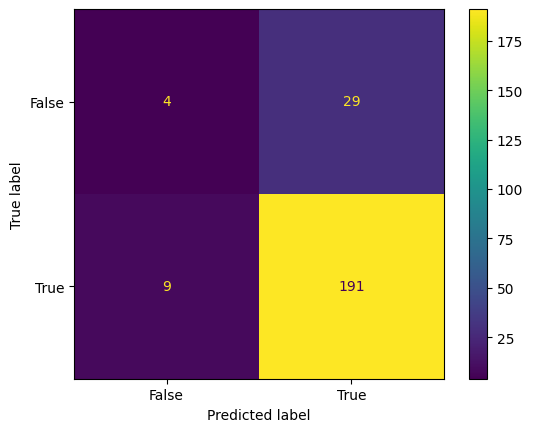

In [154]:
pipe1 = Pipeline([ ('std', StandardScaler()), ('Random_forest', RandomForestClassifier(n_estimators = 150))], verbose = True)

# fitting the data in the pipe
pipe1.fit(data_pca, y_train)

prob_score=pipe1.predict_proba(test_pca)
print("Utterance level accuracy: ", accuracy_score(y_test, pipe1.predict(test_pca)))
# accuracy(y_test, prob_score, s_test)
print(sklearn.metrics.f1_score(y_test, pipe1.predict(test_pca)))
print(classification_report(y_test, pipe1.predict(test_pca),target_names=["class0","class1"]))
rf_score=prob_score
# print(rf_score)
confusion_matrix = metrics.confusion_matrix(y_test, pipe1.predict(test_pca))
print("Balanced Accuracy: "+ str(balanceaccuracy(confusion_matrix)))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# SVM

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics



In [156]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear',probability=True)

# Fit the model
svc.fit(data_pca, y_train)

SVC(kernel='linear', probability=True, random_state=1)

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
Utterance level accuracy:  0.8197424892703863
0.896551724137931
              precision    recall  f1-score   support

      class0       0.33      0.27      0.30        33
      class1       0.88      0.91      0.90       200

    accuracy                           0.82       233
   macro avg       0.61      0.59      0.60       233
weighted avg       0.81      0.82      0.81       233

Balanced Accuracy: 0.5913636363636363


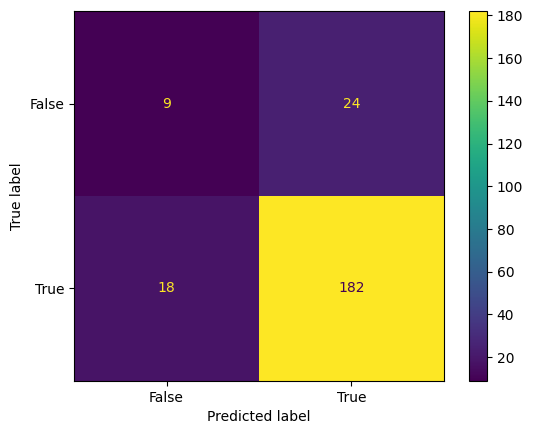

In [157]:
pipe1 = Pipeline([ ('std', StandardScaler()), ('SVC', SVC(C=1.0, random_state=1, kernel='linear', probability=True))], verbose = True)

# fitting the data in the pipe
pipe1.fit(data_pca, y_train)

prob_score=pipe1.predict_proba(data_pca)
print("Utterance level accuracy: ", accuracy_score(y_test, pipe1.predict(test_pca)))
# accuracy(y_test, prob_score, s_test)
print(sklearn.metrics.f1_score(y_test, pipe1.predict(test_pca)))
print(classification_report(y_test, pipe1.predict(test_pca),target_names=["class0","class1"]))
svc_score=prob_score
# print(svc_score)
confusion_matrix = metrics.confusion_matrix(y_test, pipe1.predict(test_pca))
print("Balanced Accuracy: "+ str(balanceaccuracy(confusion_matrix)))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Logistic Regression

In [158]:
from sklearn import linear_model

In [229]:
logr = linear_model.LogisticRegression(max_iter=10000)
logr.fit(data_pca,y_train)

LogisticRegression(max_iter=10000)

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
Utterance level accuracy:  0.8197424892703863
0.8955223880597015
              precision    recall  f1-score   support

      class0       0.35      0.33      0.34        33
      class1       0.89      0.90      0.90       200

    accuracy                           0.82       233
   macro avg       0.62      0.62      0.62       233
weighted avg       0.82      0.82      0.82       233

Balanced Accuracy: 0.6166666666666667


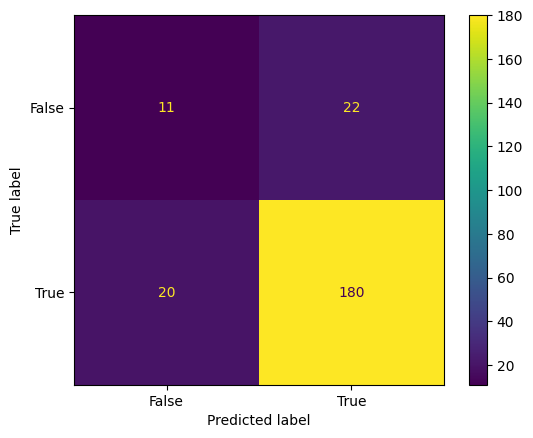

In [160]:
pipe1 = Pipeline([ ('std', StandardScaler()), ('LR', linear_model.LogisticRegression())], verbose = True)

# fitting the data in the pipe
pipe1.fit(data_pca, y_train)

prob_score=pipe1.predict_proba(test_pca)
print("Utterance level accuracy: ", accuracy_score(y_test, pipe1.predict(test_pca)))
# accuracy(y_test, prob_score, s_test)
print(sklearn.metrics.f1_score(y_test, pipe1.predict(test_pca)))
print(classification_report(y_test, pipe1.predict(test_pca),target_names=["class0","class1"]))
lr_score=prob_score
# print(lr_score)
confusion_matrix = metrics.confusion_matrix(y_test, pipe1.predict(test_pca))
print("Balanced Accuracy: "+ str(balanceaccuracy(confusion_matrix)))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Expectation Maximization

In [161]:
from sklearn.mixture import GaussianMixture

In [225]:
gmm=GaussianMixture(n_components=2,random_state=0)

In [226]:
X_train_new2.shape

(248, 88)

In [227]:
gmm.fit(X_train_new2)
# Predict the labels for the data points
predicted_labels = gmm.predict(X_test_new2)
predicted_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

Utterance level accuracy:  0.648068669527897
0.755952380952381
              precision    recall  f1-score   support

      class0       0.25      0.73      0.37        33
      class1       0.93      0.64      0.76       200

    accuracy                           0.65       233
   macro avg       0.59      0.68      0.56       233
weighted avg       0.84      0.65      0.70       233

Balanced Accuracy: 0.6811363636363637


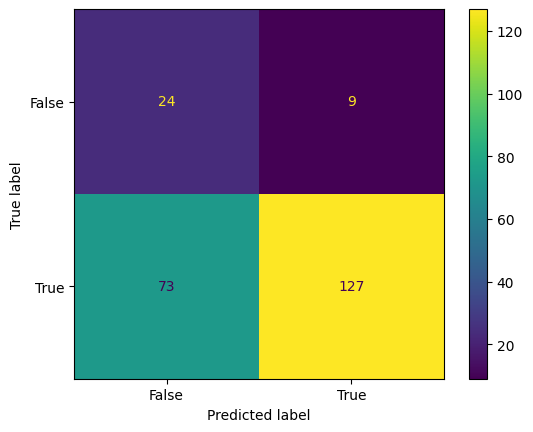

In [228]:
print("Utterance level accuracy: ", accuracy_score(y_test, predicted_labels))
# accuracy(y_test, prob_score, s_test)
print(sklearn.metrics.f1_score(y_test, predicted_labels))
print(classification_report(y_test, predicted_labels,target_names=["class0","class1"]))
lr_score=prob_score
# print(lr_score)
confusion_matrix = metrics.confusion_matrix(y_test, predicted_labels)
print("Balanced Accuracy: "+ str(balanceaccuracy(confusion_matrix)))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()